In [1]:
#ex 11.9:

In [2]:
import matplotlib.pyplot as plt
import random as RD
import scipy as SP
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#RD.seed()

In [3]:
width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init(initProb):
 

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])
    return time, config, nextConfig

In [4]:
def draw(time, config, initProb):
    plt.cla()
    plt.pcolor(config, vmin = 0, vmax = 3, cmap = plt.cm.binary)
    plt.axis('image')
    plt.title('t = ' + str(time)+ f" P: {initProb}")

In [5]:
def step(time, config, nextConfig):
    
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    return time, config, nextConfig

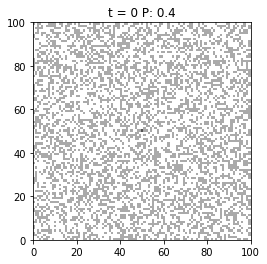

In [6]:
time, config, nextConfig = init(initProb)
draw(time, config, initProb)
#initial values:

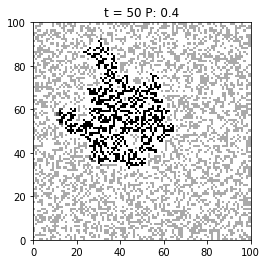

In [7]:
initProb = .4
time, config, nextConfig = init(initProb)
for i in range(50):
    time, config, nextConfig = step(time, config, nextConfig)
draw(time, config, initProb)

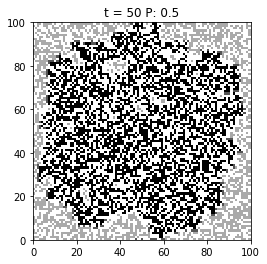

In [8]:
initProb = .5
time, config, nextConfig = init(initProb)
for i in range(50):
    time, config, nextConfig = step(time, config, nextConfig)
draw(time, config, initProb)

### Plotting the total number of burned trees as a function of p

In [9]:
p = SP.linspace(.1, 1, 10)
total_burnt = []
for initProb in p:
    time, config, nextConfig = init(initProb)
    for i in range(50):
        time, config, nextConfig = step(time, config, nextConfig)
    total_burnt.append(SP.count_nonzero(config == 3 ))


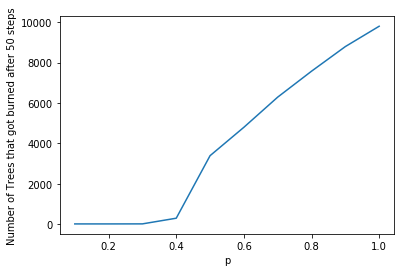

In [10]:
plt.plot(p,total_burnt )
plt.xlabel("p")
plt.ylabel("Number of Trees that got burned after 50 steps")
plt.show()
#we see that it agrees with the renomalization as the critical value is around 0.4
#I'm supposed to run multiple simulations for each p and take the average but I'm skipping this step here
#because it consumes much time and this simulation is good enough to show the critical values

### Plotting the time until the fire stops spreading as a function of p.

In [11]:
p = SP.linspace(.1, 1, 10)
time_list = []
for initProb in p:
    time, config, nextConfig = init(initProb)
    stopped = False
    n = 1
    time, config, nextConfig = step(time, config, nextConfig)
    old_dead_number = SP.count_nonzero(config == 3 )
    while not stopped:
        n+=1
        time, config, nextConfig = step(time, config, nextConfig)
        new_dead_number = SP.count_nonzero(config == 3 )
        if new_dead_number ==old_dead_number:
            stopped = True
        else:
            old_dead_number = new_dead_number
    time_list.append(n)    


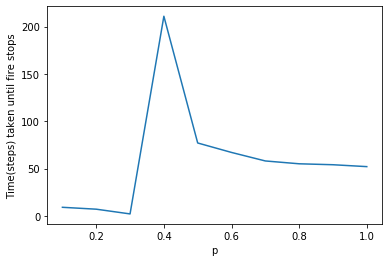

In [12]:
plt.plot(p, time_list)
plt.xlabel("p")
plt.ylabel("Time(steps) taken until fire stops")
plt.show()

In [13]:
#Excercise 12.8: These configurations are not complete, there are more configurations that will increase the probability
#for example, in the 4x4 grid, you could have the top row empty while all the other rows full and that will be a
#configuration that will lead to fire but it's not accounted for in the simulation

### The stretch goal

In [14]:
def stretch_step(time, config, nextConfig, ignite_prop):
    
    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            if RD.random() < ignite_prop:
                                state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    return time, config, nextConfig

In [15]:
# generating all possible values for ignition probability and tree density:
ignite_prop_lists = SP.linspace(.1, 1, 10)
p = SP.linspace(.1, 1, 10)

points = [] #(ignite, p, time)
for ignite_prop in ignite_prop_lists:
    time, config, nextConfig = init(initProb)
    for initProb in p:
        time, config, nextConfig = init(initProb)
        for i in range(50):
            time, config, nextConfig = stretch_step(time, config, nextConfig, ignite_prop)
        points.append([ignite_prop,initProb,SP.count_nonzero(config == 3 )])


In [16]:
#get the x, y, and z axis for plotting
xs = []
ys = []
zs = []
for point in points:
    xs.append(point[0])
    ys.append(point[1])
    zs.append(point[2])

Text(0.5, 0, 'p')

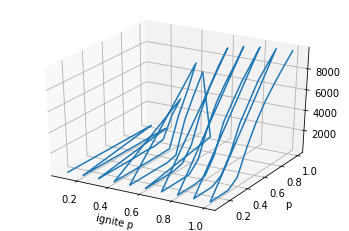

In [17]:
#plotting a plot to see the critical value
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=xs, ys=ys, zs = zs)
plt.xlabel('ignite p')
plt.ylabel('p')


In [18]:
# we see from the graph that the critical values are around ignite_p = .3 and p=.4
#Now, let's do renormalization:
#if we have one cell, then the p_s+1 = p_s*i, if we have four cells, then we will need the fire to move at least
#from one of these cells to the other which will take a probability i^2 
#This means that the differnce equation:
#P_s+1 = (p_s**4 + 4*p_s**3*(1-p_s) + 4*p_s**2*(1-p_s)**2) * i^2 where i is the ignition probability
# i is squared because we always have two "blocks" and each have probability i of getting fire

# we can now plot the cobweb

In [19]:
#getting the points for the difference equation curve:
i = SP.linspace(.1, 1, 10)
p_s = SP.linspace(.1, 1, 10)
p_s1 = []
for ig in i:
    for p in p_s:
        p_s1.append( [ig,p, (p**4 + 4*(p**3)*(1-p) + 4*(p**2)*(1-p)**2) * ig**2] )

In [20]:
#putting them into x, y, z points:
xs = [] #ig
ys = []#p
zs = []#ps1
for point in p_s1:
    xs.append(point[0])
    ys.append(point[1])
    zs.append(point[2])

In [21]:
#getting the points for the line (which will now be a plane)
p_line = []
for ig in i:
    for p in p_s:
        p_line.append( [ig, p, p] )

In [22]:
# the coordinates of the line (plane)
line_xs = [] #ig
line_ys = []#p
line_zs = []#ps1
for point in p_line:
    line_xs.append(point[0])
    line_ys.append(point[1])
    line_zs.append(point[2])


Text(0.5, 0, 'p')

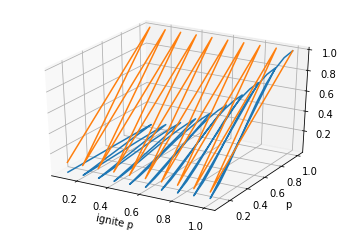

In [23]:
#making the cobweb plot:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs=xs, ys=ys, zs = zs)
ax.plot(line_xs, line_ys,line_zs)
plt.xlabel('ignite p')
plt.ylabel('p')


In [24]:
#to make it look better, we can make a surface plot:
i = SP.linspace(.1, 1, 10)
p_s = SP.linspace(.1, 1, 10)

X,Y = np.meshgrid(i,p_s)
Z= (Y**4 + 4*(Y**3)*(1-Y) + 4*(Y**2)*((1-Y)**2)) * X**2


Text(0.5, 0, 'p')

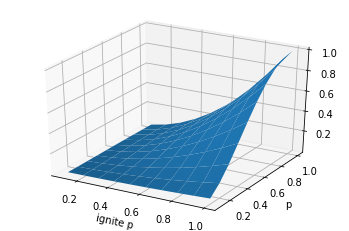

In [25]:
#plotting the surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)
plt.xlabel('ignite p')
plt.ylabel('p')


Text(0.5, 0, 'p')

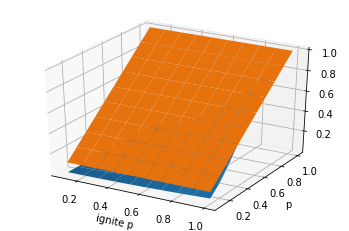

In [26]:
#plotting the plane:
line_i = SP.linspace(.1, 1, 10)
line_p_s = SP.linspace(.1, 1, 10)
line_X, line_Y = np.meshgrid(i,p_s)
line_Z=line_Y

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z)
ax.plot_surface(line_X, line_Y, line_Z)
plt.xlabel('ignite p')
plt.ylabel('p')


In [27]:
#we can now see that the approximation and the simulations are very similar and two them indicate critical values of p
# and i around i = 0.3, p = 0.4